In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import os
import shutil

In [9]:
# Read csv file
df = pd.read_csv(r'D:\Train\data\train_ship_segmentations_v2.csv')
# Path to dataset
data_dir = r'D:\Train\data\train_v2'

In [4]:
# Reading the first five elements in a csv file
df.head(5)

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [6]:
# Informations about a csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB


In [19]:
# Print total elements, no ship elements, ship elements
total_records = len(df)
no_ship_records = df['EncodedPixels'].isna().sum()
ship_records = total_records - no_ship_records
print(f"Total records: {total_records}")
print(f"No ships records: {no_ship_records}")
print(f"Ships records: {ship_records}")

Total records: 231723
No ships records: 150000
Ships records: 81723


In [23]:
# Calculation and print in percentage of the image with and without ships
percent_with_ships = (ship_records / total_records) * 100
percent_without_ships = (no_ship_records / total_records) * 100
print(f"Percent with ships {percent_with_ships}")
print(f"Percent without ships {percent_without_ships}")

Percent with ships 35.26753926023744
Percent without ships 64.73246073976256


In [34]:
# Calculation of the number of ships per image and their distribution
ship_counts = df.dropna().groupby('ImageId').size()
average_ships_per_image = ship_counts.mean()
ship_counts_distribution = ship_counts.value_counts().sort_index()
average_ships_per_image, ship_counts_distribution

(1.9203637559921045,
 1     27104
 2      7674
 3      2954
 4      1622
 5       925
 6       657
 7       406
 8       318
 9       243
 10      168
 11      144
 12      124
 13       75
 14       76
 15       66
 Name: count, dtype: int64)

C:\Users\user1\AppData\Local\Temp\ipykernel_16936\4039202642.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels))


([<matplotlib.axis.XTick at 0x235d757c1c0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

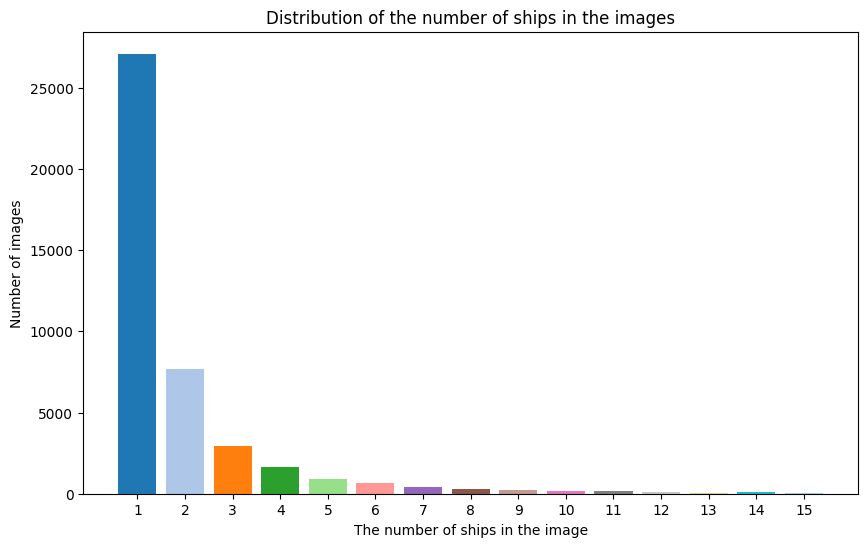

In [39]:
# Using matplotlib to visualize the distribution of the number of ships in the images
import matplotlib.pyplot as plt

labels = ship_counts_distribution.index.tolist()
counts = ship_counts_distribution.values.tolist()

colors = plt.cm.get_cmap('tab20', len(labels))

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=[colors(i) for i in np.arange(len(labels))])
plt.xlabel('The number of ships in the image')
plt.ylabel('Number of images')
plt.title('Distribution of the number of ships in the images')
plt.xticks(labels)

Text(0, 0.5, 'Number of Image')

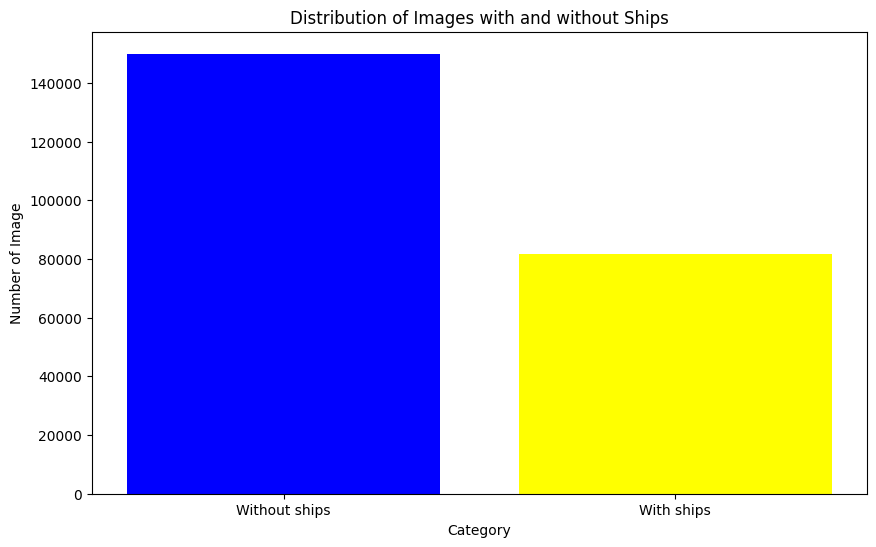

In [40]:
# Using matplotlib to visualize the distribution of images with and without ships
labels = ['Without ships', 'With ships']
counts = [no_ship_records, ship_records]
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'yellow'])
plt.title('Distribution of Images with and without Ships')
plt.xlabel('Category')
plt.ylabel('Number of Image')

In [ ]:
# Function to check if images are valid
import os
from PIL import Image, UnidentifiedImageError

def is_valid_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return True
    except (UnidentifiedImageError, IOError) as e:
        print(f"Error reading image {image_path}: {e}")
        return False
    
# Function to check all images in a directory and report broken files
def check_images(data_dir, labels):
    broken_files = []
    total_files = 0
    
    for label in labels:
        folder = os.path.join(data_dir, label)
        for filename in os.listdir(folder):
            if filename.endswith('.jpg'):
                image_path = os.path.join(folder, filename)
                total_files += 1
                if not is_valid_image(image_path):
                    broken_files.append(image_path)
    
    print(f"Total files checked: {total_files}")
    print(f"Number of broken files: {len(broken_files)}")
    if broken_files:
        print("Broken files:")
        for file in broken_files:
            print(file)

check_images(data_dir, labels)


In [5]:
# Create directories for organized images if they don't exist
image_folder = r'D:\Train\data\train_v2'
ships_folder = 'ships1'
no_ships_folder = 'no_ships1'
if not os.path.exists(ships_folder):
    os.makedirs(ships_folder)
if not os.path.exists(no_ships_folder):
    os.makedirs(no_ships_folder)

In [7]:
# Function to move images based on ship presence in metadata
def move_files(row):
    image_id = row['ImageId']
    encoded_pixels = row['EncodedPixels']
    source_path = os.path.join(image_folder, image_id)
    if pd.isna(encoded_pixels):
         destination_path = os.path.join(no_ships_folder, image_id)
    else:
        destination_path = os.path.join(ships_folder, image_id)
    
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)

In [8]:
# Run a function to move files based on metadata
df.apply(move_files, axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
231718    None
231719    None
231720    None
231721    None
231722    None
Length: 231723, dtype: object